In [35]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 
plt.style.use('default')
import os 
import pandas as pd
from tqdm import tqdm

In [36]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances,manhattan_distances,paired_manhattan_distances,euclidean_distances
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import adjusted_mutual_info_score,adjusted_rand_score,classification_report


In [37]:
from graphics import *

In [38]:
#filepath dataclean
filepath = './data_clean/'
listfiles = os.listdir(filepath)
listnpz = []
for c in listfiles:
    if c[-3:] == 'npz':
        listnpz.append(os.path.join(filepath,c))

In [39]:
listnpz

['./data_clean/caroleeg_sess3.npz',
 './data_clean/caroleeg_sess5_2.npz',
 './data_clean/caroleeg_sess5_1.npz',
 './data_clean/caroleeg_sess2.npz',
 './data_clean/caroleeg_sess4_1.npz',
 './data_clean/caroleeg_sess6.npz',
 './data_clean/caroleeg_sess4_3.npz',
 './data_clean/caroleeg_sess4_2.npz',
 './data_clean/caroleeg_perf1.npz',
 './data_clean/caroleeg_perf2.npz']

In [78]:
def get_audio():
    audios = []
    for curnpz in listnpz:        
        name = curnpz.split('/')[2][:-4]
        print("load {}".format(name))
        audio,_ = load_audio(name)
        audios.append(audio)
    return audios

In [79]:
audios = get_audio()

load caroleeg_sess3
load caroleeg_sess5_2
load caroleeg_sess5_1
load caroleeg_sess2
load caroleeg_sess4_1
load caroleeg_sess6
load caroleeg_sess4_3
load caroleeg_sess4_2
load caroleeg_perf1
load caroleeg_perf2


In [6]:
def analyse(id, find = True):
    curnpz = listnpz[id]
    name = curnpz.split('/')[2][:-4]
    print("Analysing {}".format(name))
    
    focus = np.load(curnpz)['focus']        
    subjtime = np.load(curnpz)['subjtime']     
    labels = np.load(curnpz)['labels'] 
    labels_audio = np.load(curnpz)['labels_audio'] 
    cal = np.load(curnpz)['cal']
    
    cluster_path  = "./results_13_08/"
    
    info = {'name': name,
           'curnpz': curnpz,
           'focus': focus,
           'subjtime': subjtime,
           'labels': labels,
           'labels_audio': labels_audio,
           'calinksi': cal,
           'cluster_path' : cluster_path}
    make_plot(info)    

# Analyse

Analysing caroleeg_sess3


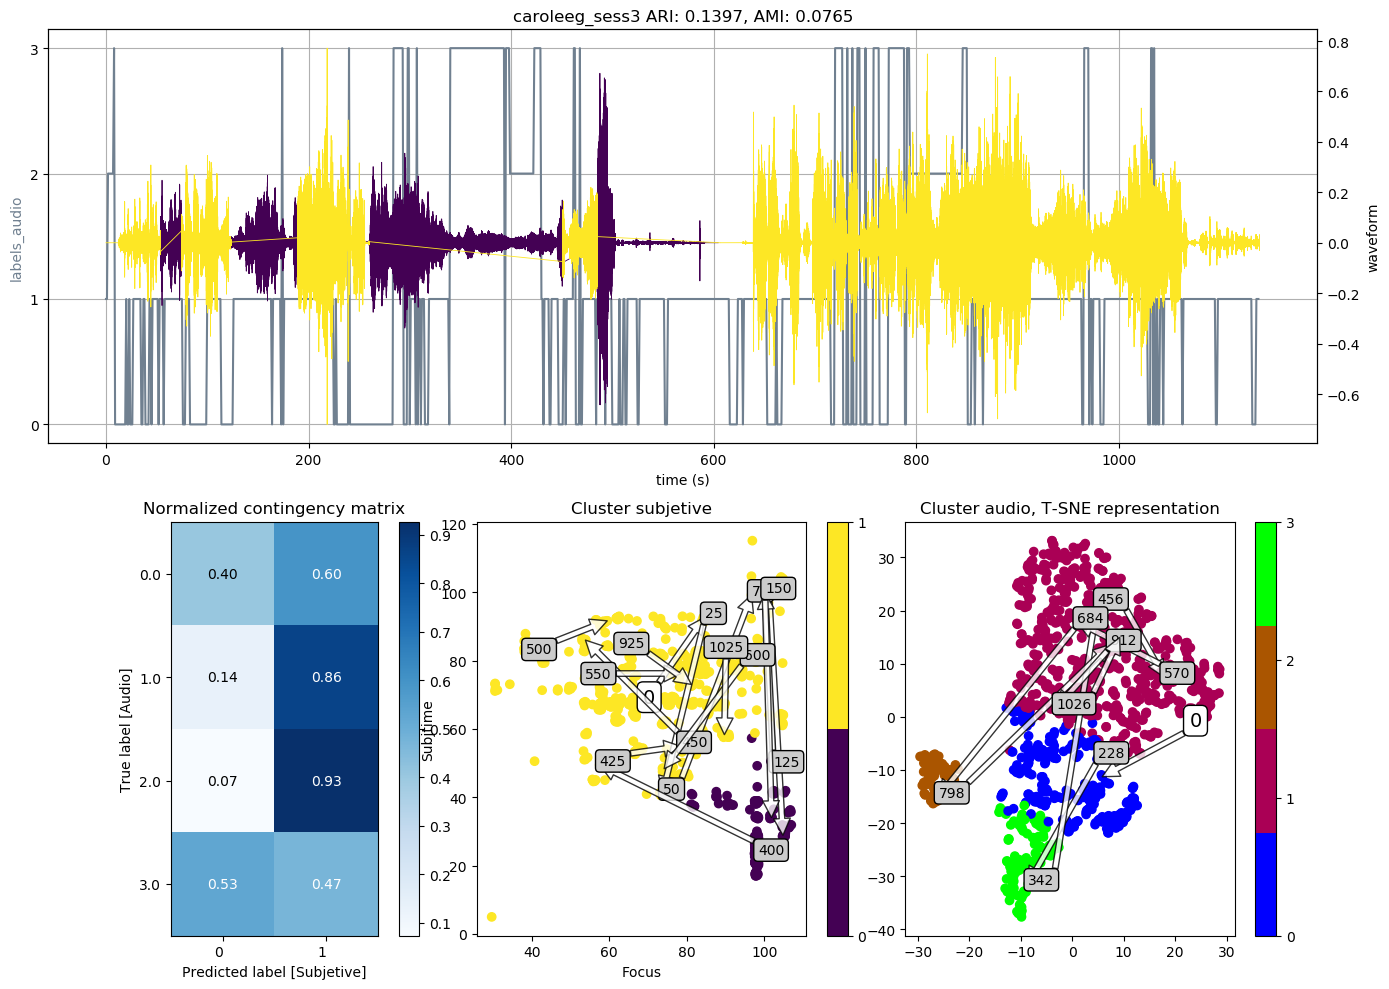

In [7]:
analyse(0)

Analysing caroleeg_sess5_2


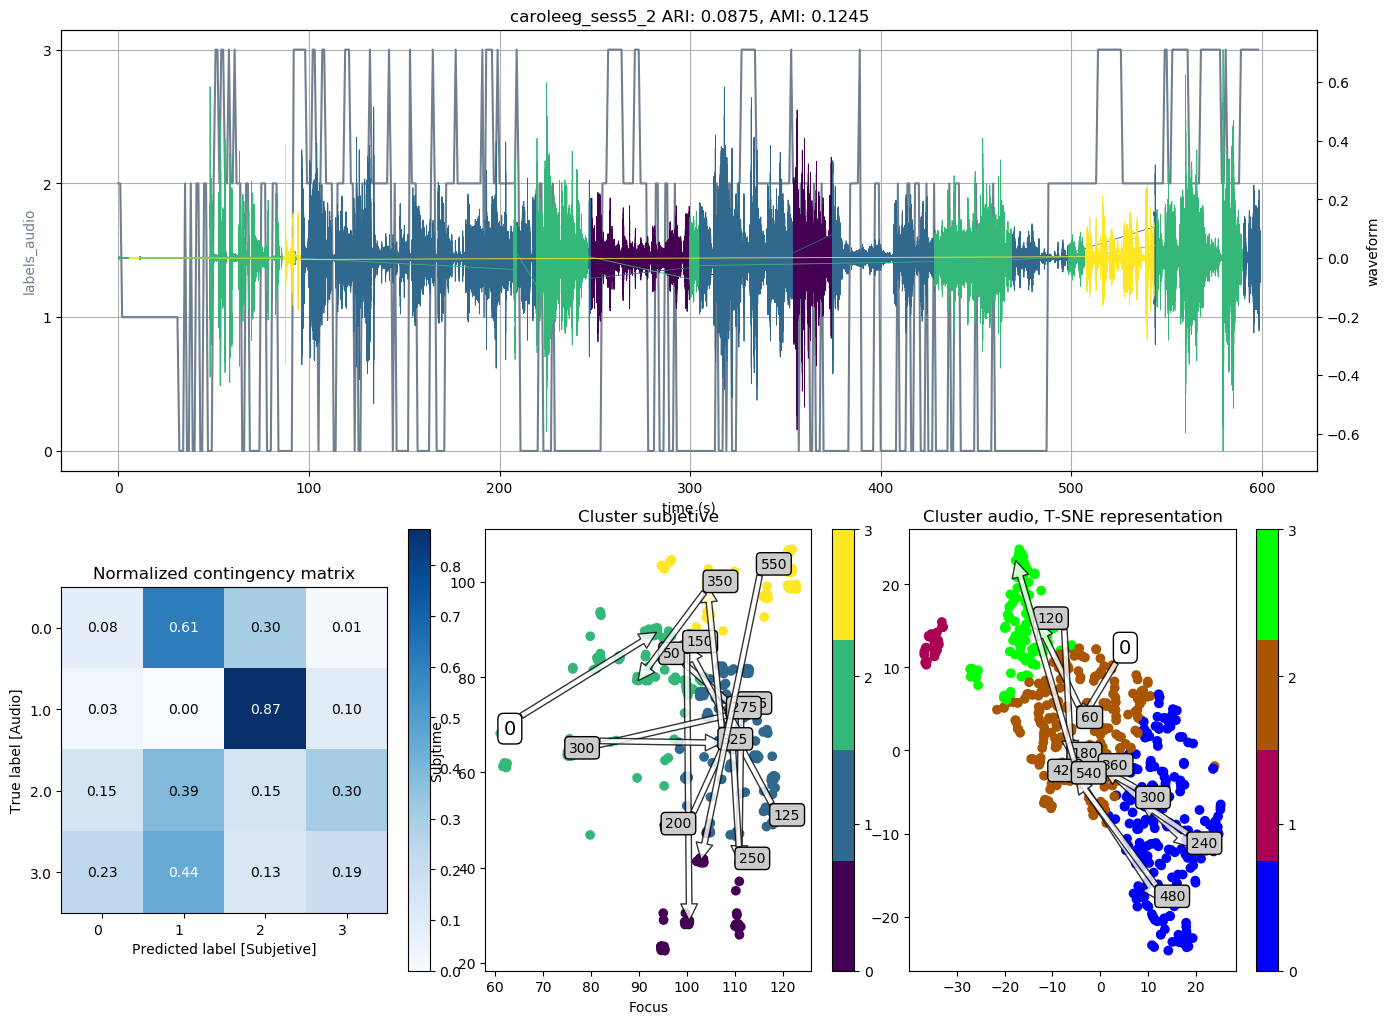

In [8]:
analyse(1)

Analysing caroleeg_sess5_1


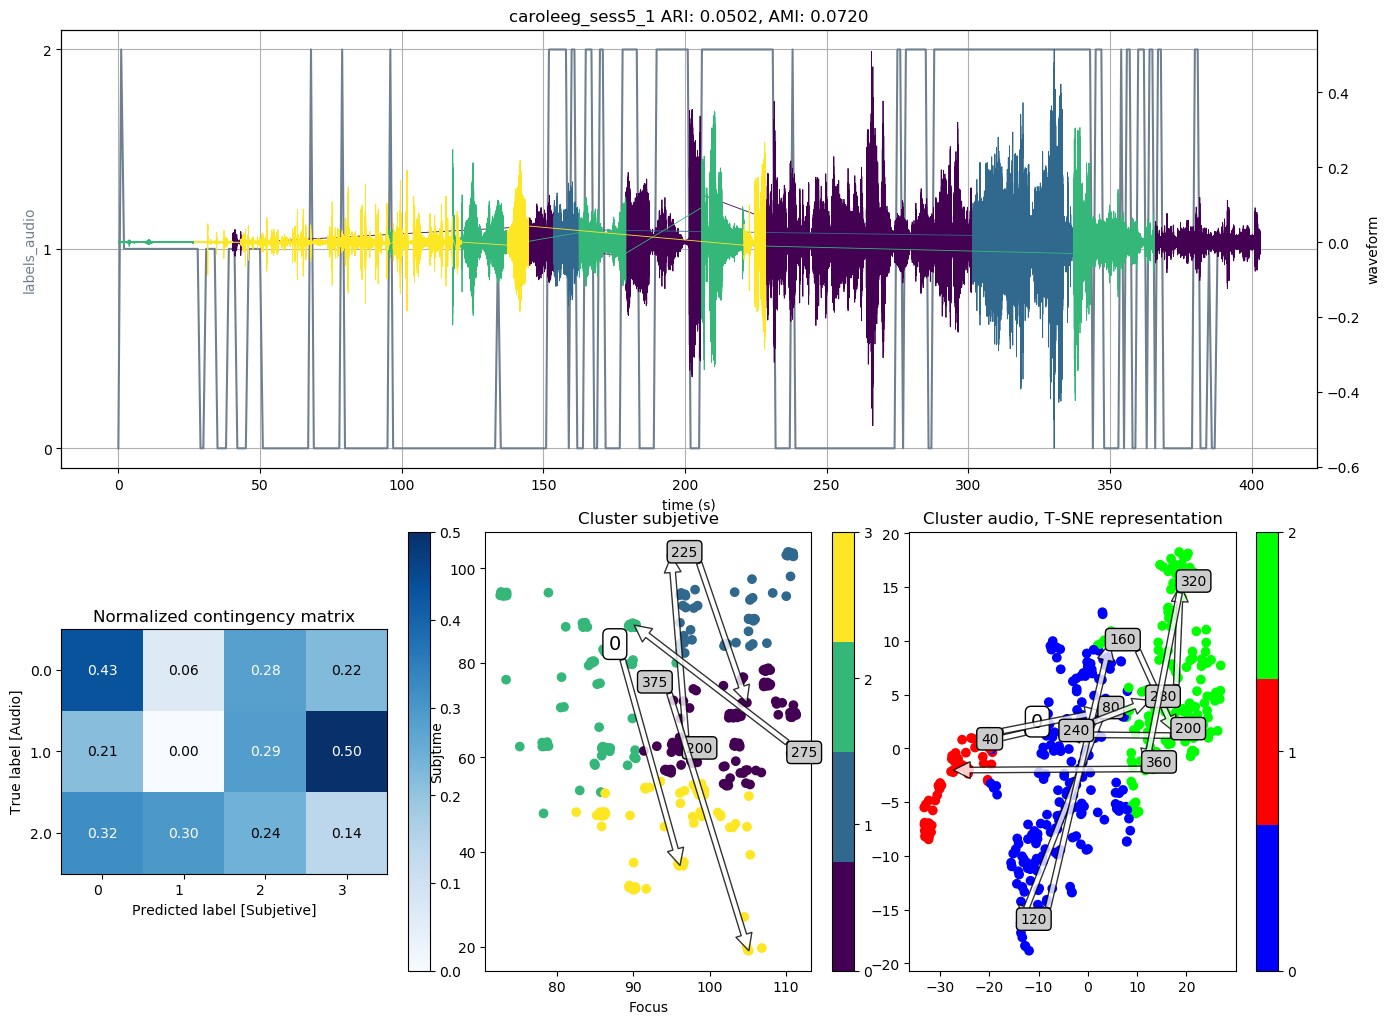

In [9]:
analyse(2)

Analysing caroleeg_sess2


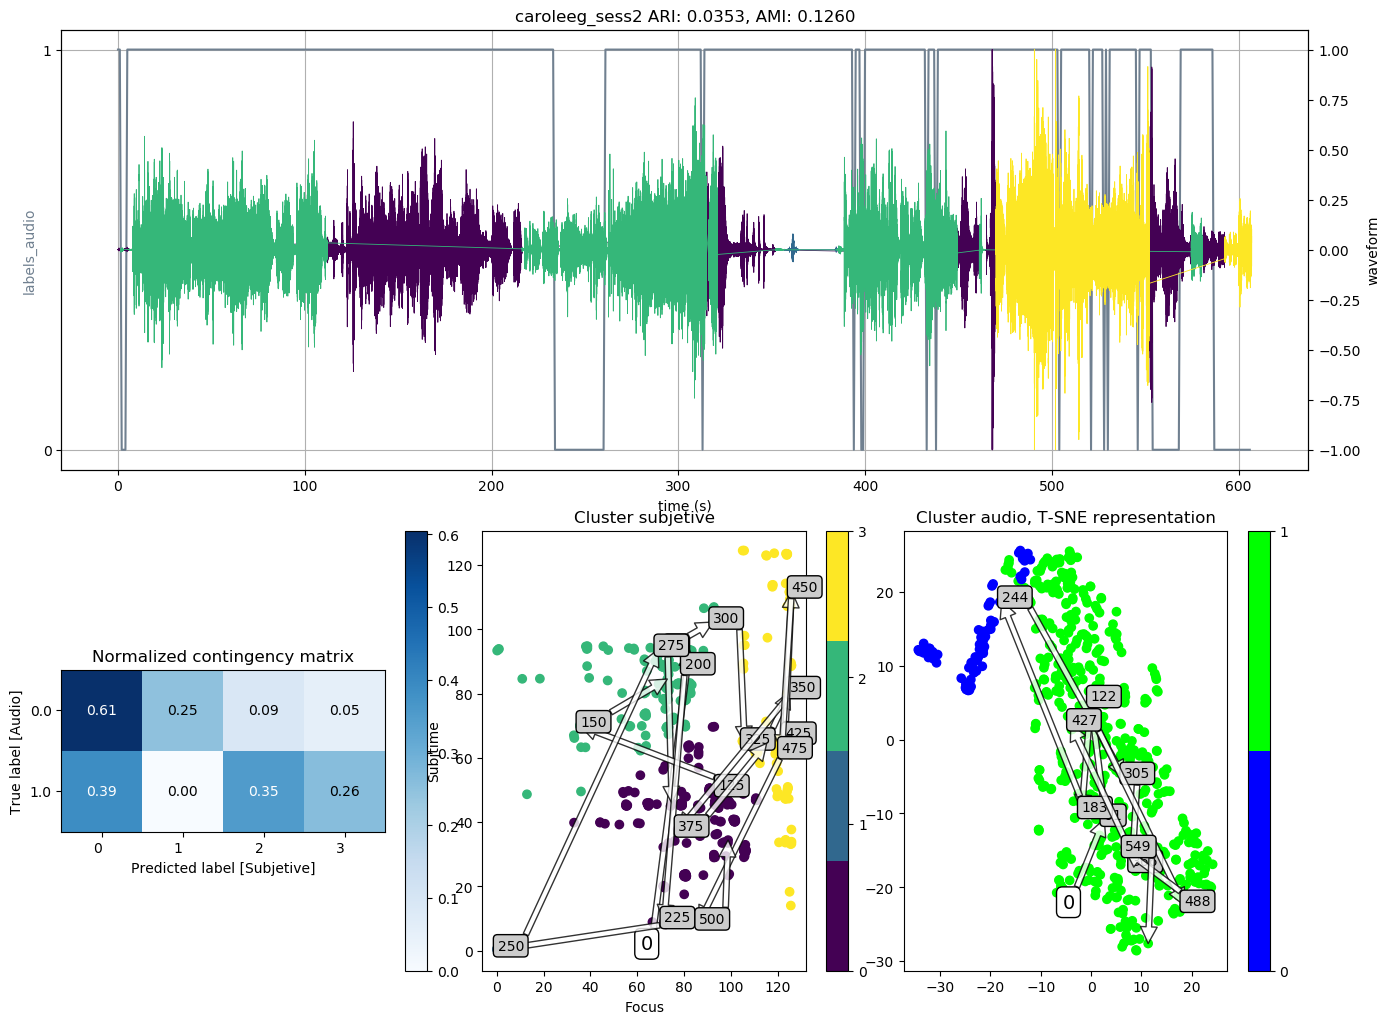

In [10]:
analyse(3)

Analysing caroleeg_sess6


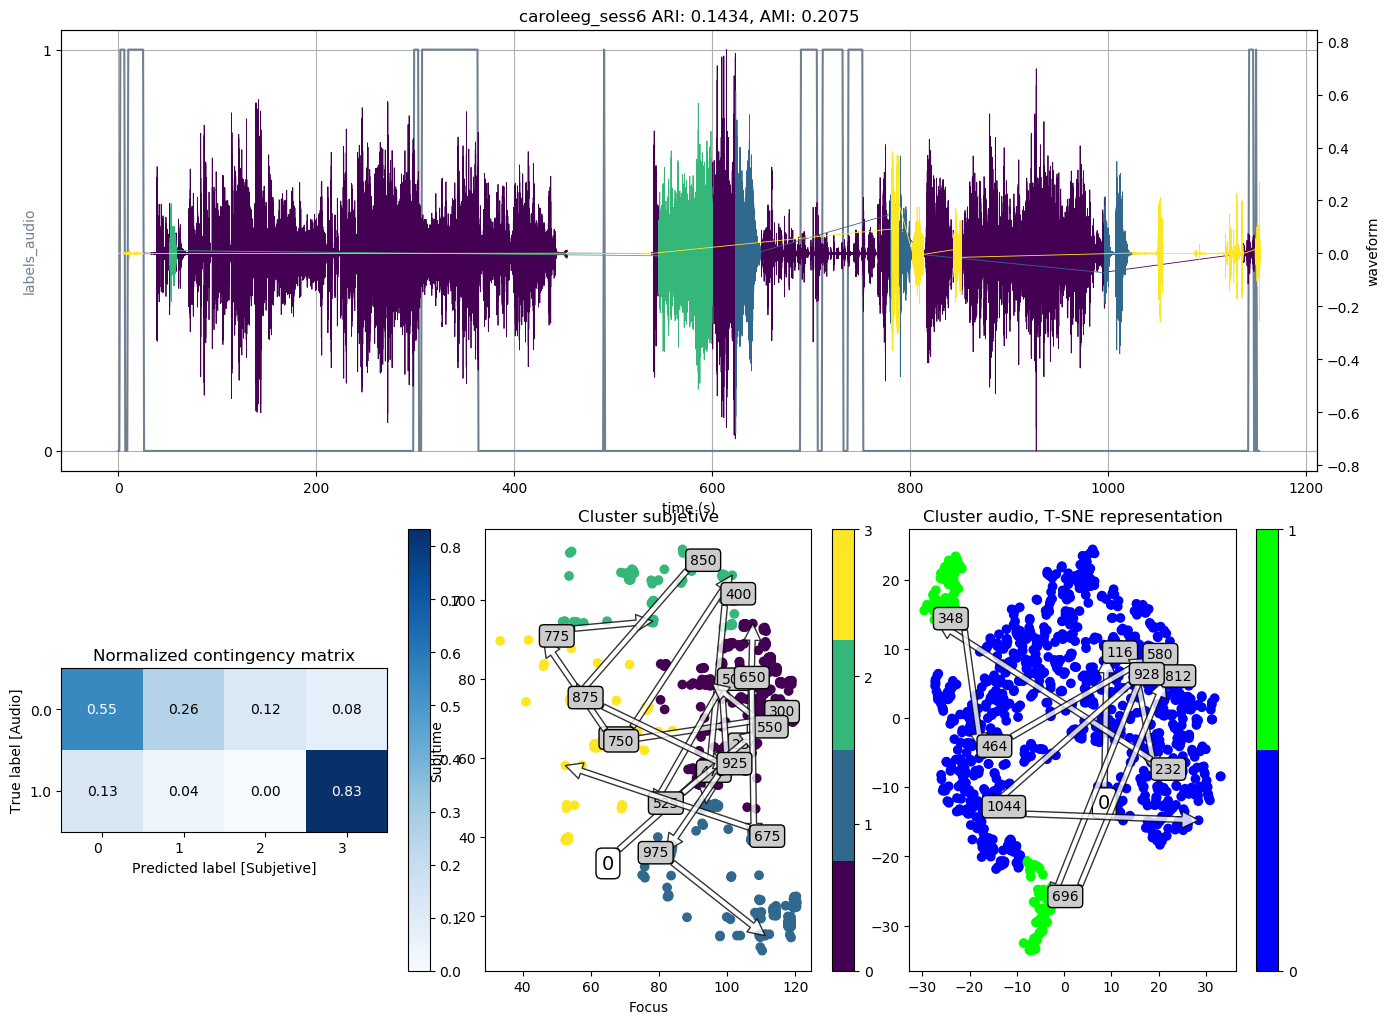

In [11]:
analyse(5)

Analysing caroleeg_sess4_2


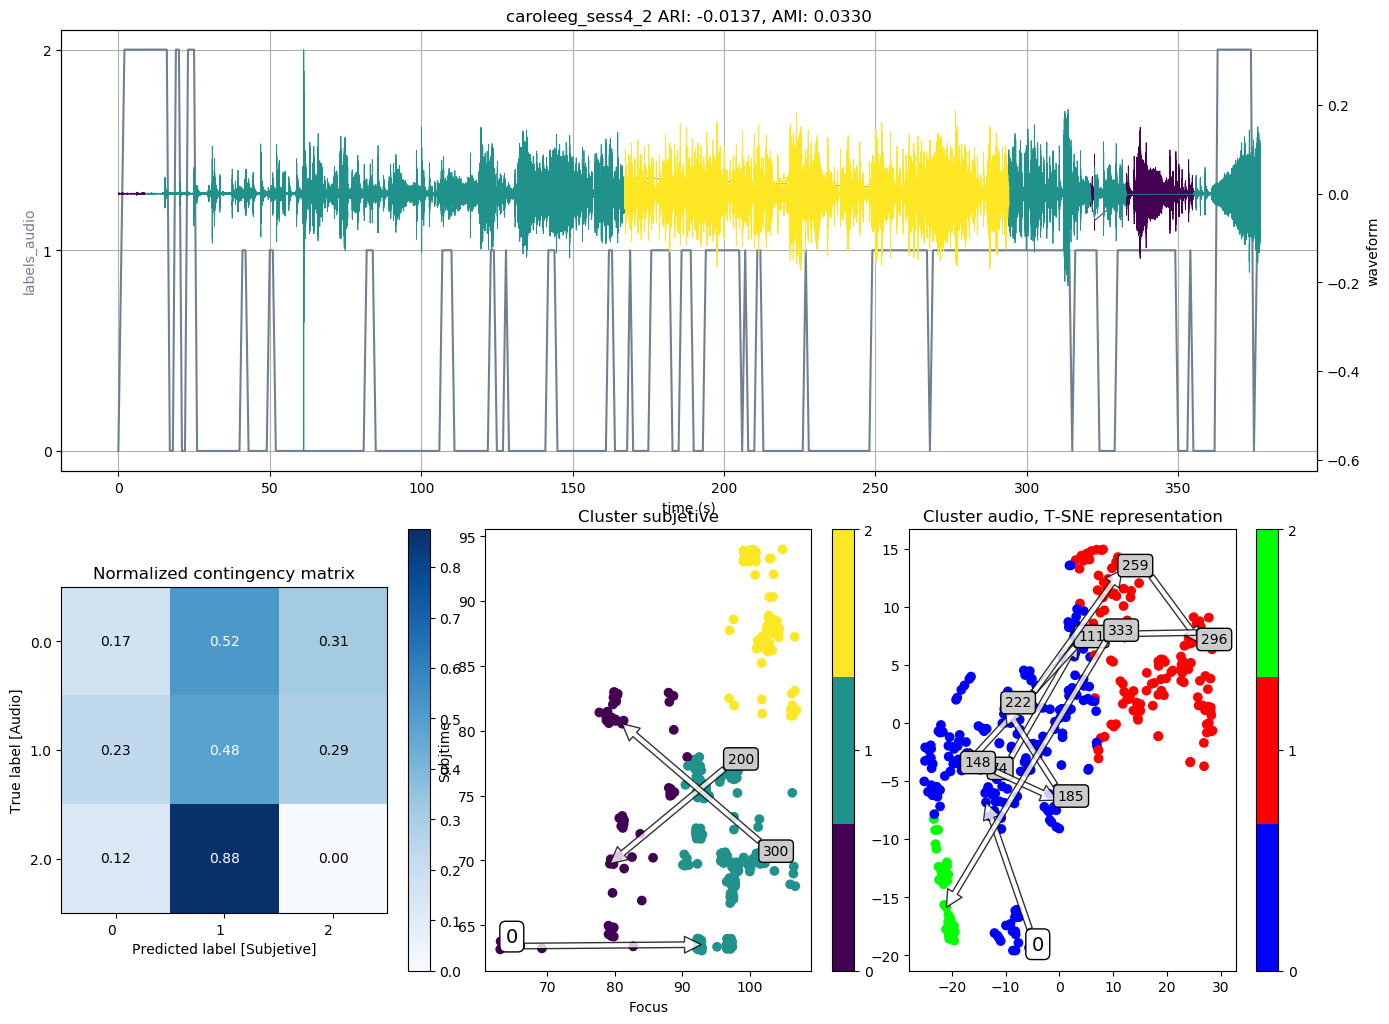

In [12]:
analyse(7)

Analysing caroleeg_perf1


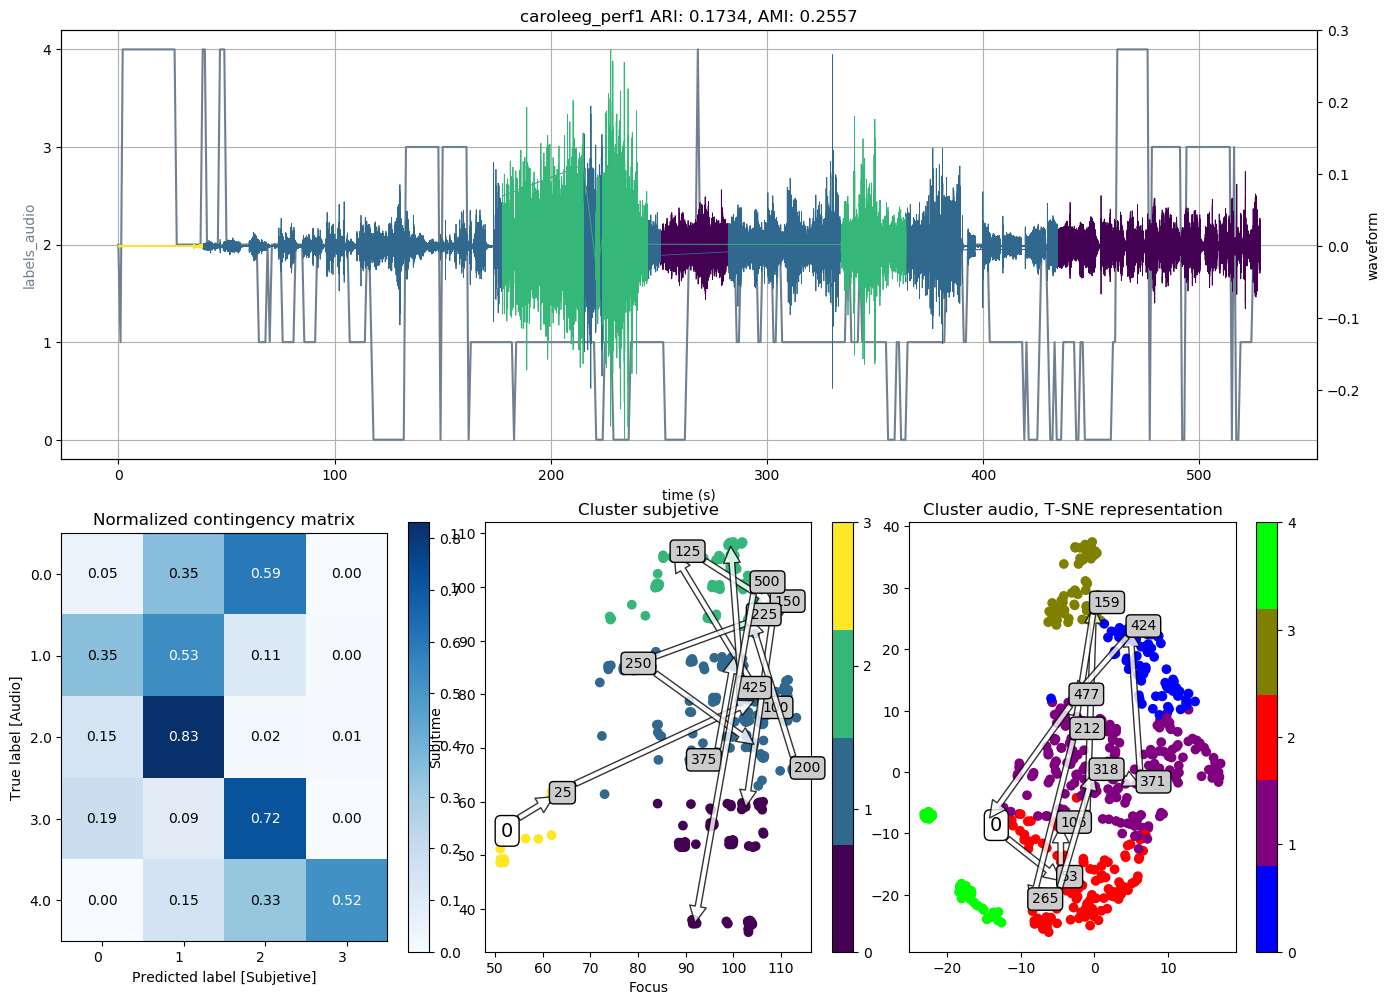

In [14]:
analyse(8)

Analysing caroleeg_perf2


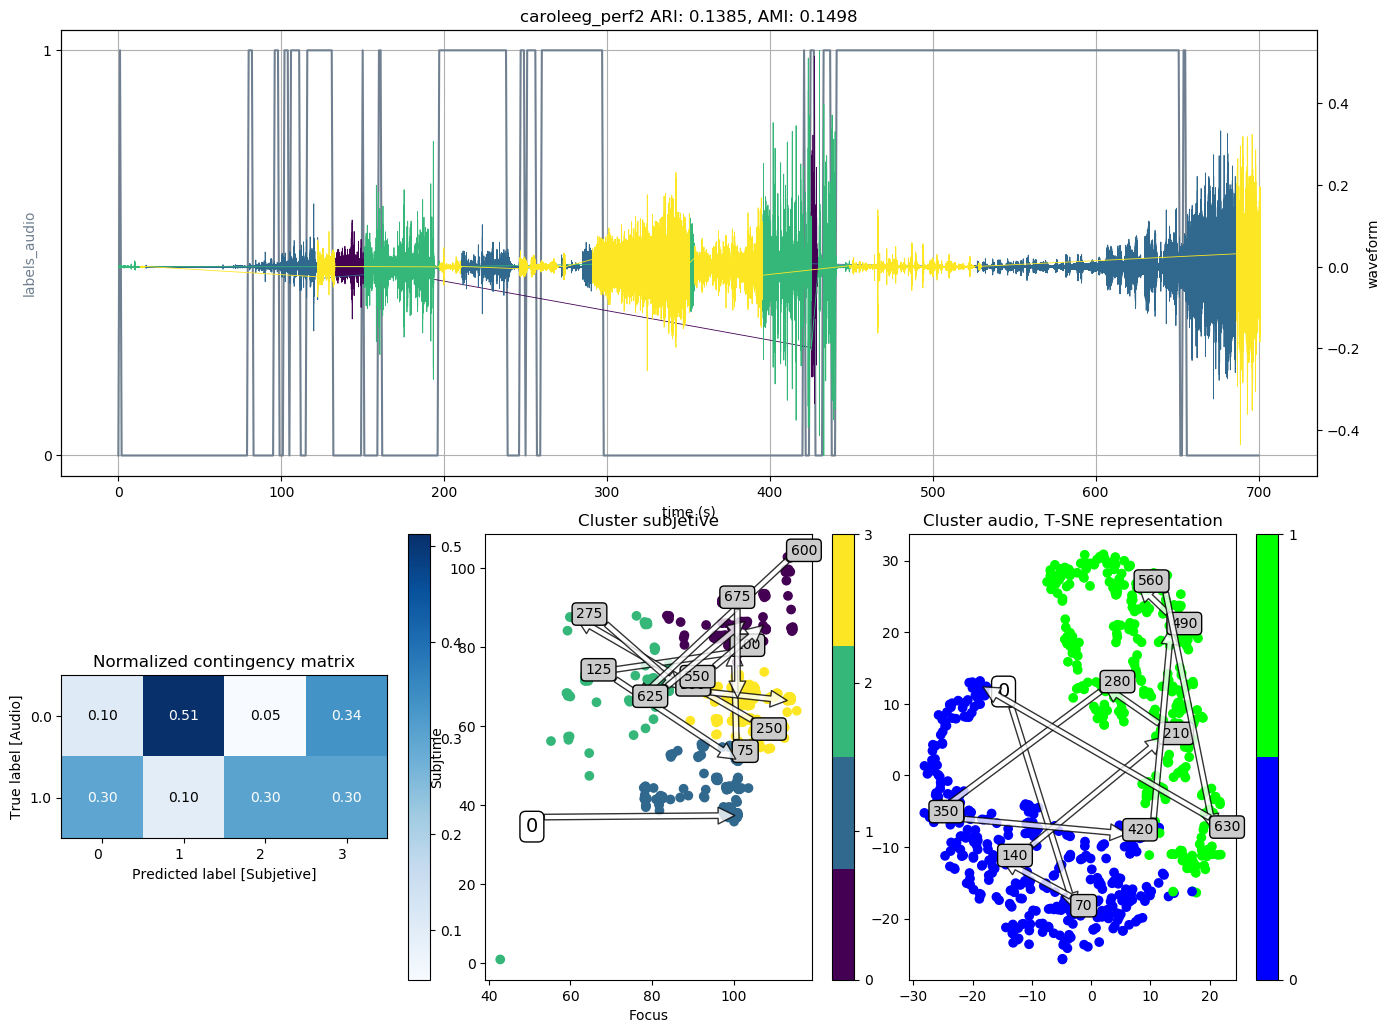

In [15]:
analyse(9)

# matrix

In [20]:
from scipy.linalg import norm
def compare_mat(id):
    curnpz = listnpz[id]
    name = curnpz.split('/')[2][:-4] 
     
    labels = np.load(curnpz)['labels'].reshape(-1, 1)
    labels_audio = np.load(curnpz)['labels_audio'].reshape(-1, 1)
    
    m1 = cosine_similarity(labels_audio)
    m2 = cosine_similarity(labels)
    dif = norm(m1-m2)
    fig, ax = plt.subplots(1,2)
    
    ax[0].imshow(m1)
    ax[0].set(title='cos sim labels audio')
    ax[1].imshow(m2)
    ax[1].set(title='cos sim labels rating')

    plt.suptitle("{}||m1 - m2|| = {}".format(curnpz,dif))

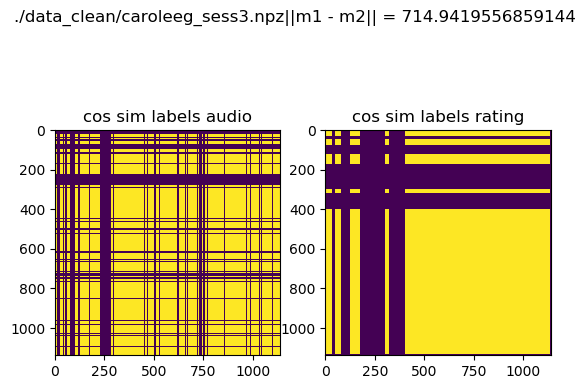

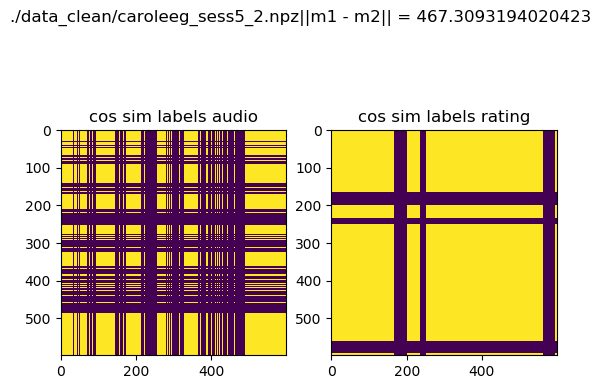

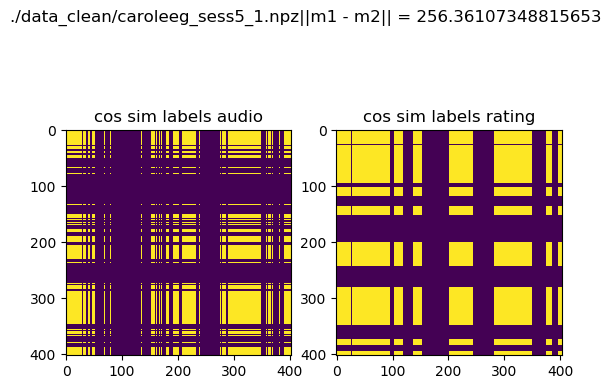

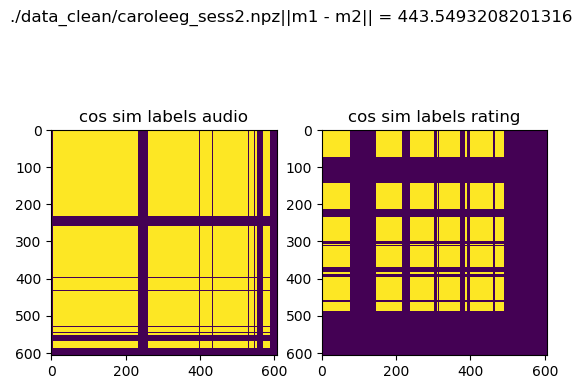

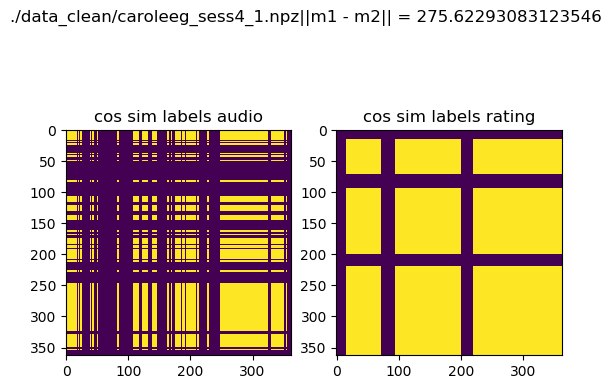

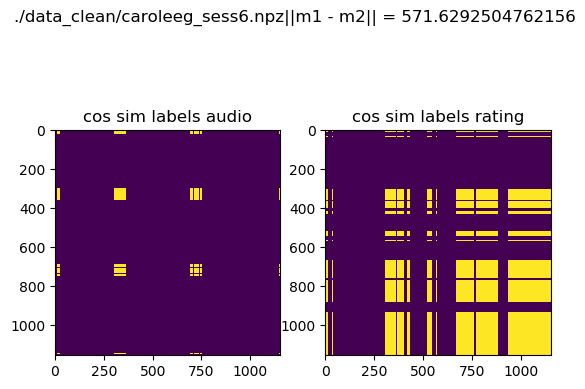

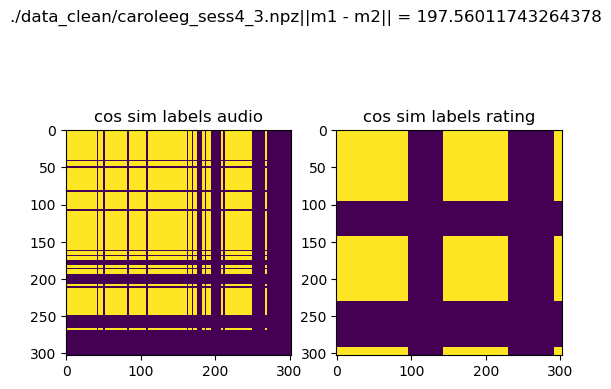

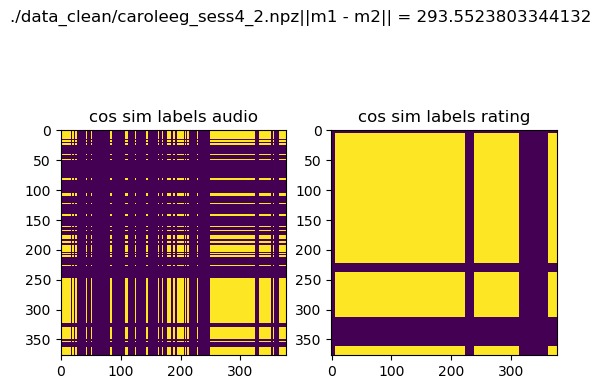

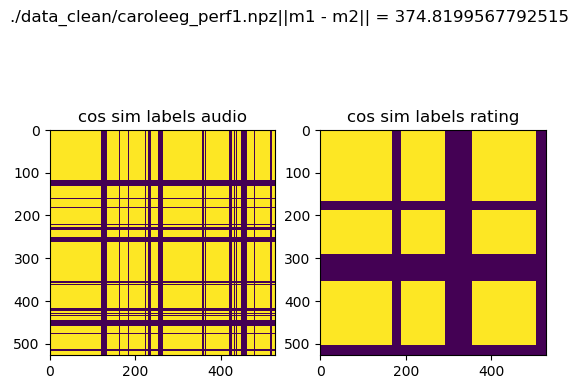

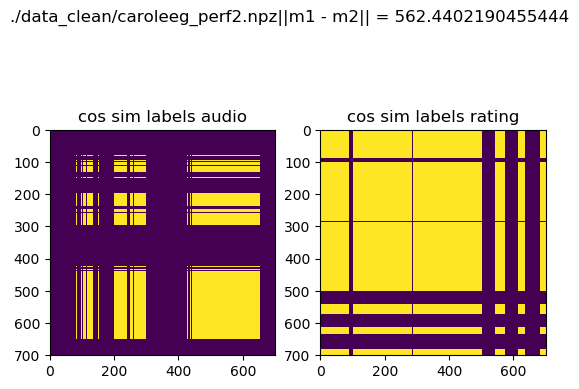

In [21]:
for i in range(10):
    compare_mat(i)